In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
diagnostics_table = pd.read_excel("Diagnostics.xlsx")

# Drop FileName (not useful for prediction)
X = diagnostics_table.drop(columns=["FileName", "Rhythm", "Beat"])

# Encode categorical variables (Gender)
X["Gender"] = LabelEncoder().fit_transform(X["Gender"])

# Target variables
y_rhythm = diagnostics_table["Rhythm"]
y_beat = diagnostics_table["Beat"]

# Encode targets
rhythm_encoder = LabelEncoder()
y_rhythm = rhythm_encoder.fit_transform(y_rhythm)


In [3]:
rhythm_encoder.classes_

array(['AF', 'AFIB', 'AT', 'AVNRT', 'AVRT', 'SA', 'SAAWR', 'SB', 'SR',
       'ST', 'SVT'], dtype=object)

In [4]:

# Split into train and test (70-30)
X_train, X_test, y_rhythm_train, y_rhythm_test = train_test_split(
    X, y_rhythm, test_size=0.3, random_state=42, stratify=y_rhythm
)


In [5]:

# Train RandomForest for Rhythm
rf_rhythm = RandomForestClassifier(n_estimators=100, random_state=42)
rf_rhythm.fit(X_train, y_rhythm_train)

# Predictions
y_rhythm_pred = rf_rhythm.predict(X_test)

# Reports
print("=== Rhythm Classification Report ===")
print(classification_report(y_rhythm_test, y_rhythm_pred))


=== Rhythm Classification Report ===
              precision    recall  f1-score   support

           0       0.26      0.07      0.11       134
           1       0.73      0.76      0.74       534
           2       0.00      0.00      0.00        36
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         2
           5       0.67      0.29      0.41       120
           6       0.00      0.00      0.00         2
           7       0.99      0.99      0.99      1167
           8       0.78      0.92      0.84       548
           9       0.87      0.96      0.91       470
          10       0.69      0.83      0.75       176

    accuracy                           0.85      3194
   macro avg       0.45      0.44      0.43      3194
weighted avg       0.82      0.85      0.83      3194



/home/tariq/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/tariq/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/tariq/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


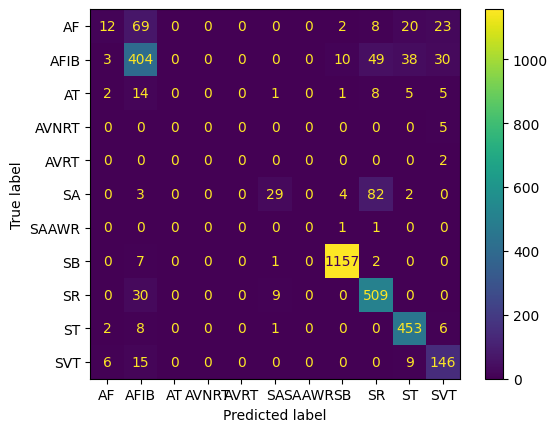

In [14]:
cmatrix = confusion_matrix(y_rhythm_test, y_rhythm_pred)
disp = ConfusionMatrixDisplay(cmatrix,display_labels=list(rhythm_encoder.classes_))
disp.plot()
plt.show()

In [ ]:
# Gradient Boost

In [18]:
# Train GradientBoosting for Rhythm
gbt = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbt.fit(X_train, y_rhythm_train)

# Predictions
y_rhythm_pred = gbt.predict(X_test)

# Reports
print("=== Rhythm Classification Report ===")
print(classification_report(y_rhythm_test, y_rhythm_pred))

=== Rhythm Classification Report ===
              precision    recall  f1-score   support

           0       0.39      0.16      0.23       134
           1       0.74      0.76      0.75       534
           2       0.00      0.00      0.00        36
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         2
           5       0.67      0.27      0.38       120
           6       0.00      0.00      0.00         2
           7       0.99      0.99      0.99      1167
           8       0.79      0.93      0.85       548
           9       0.88      0.95      0.92       470
          10       0.70      0.79      0.74       176

    accuracy                           0.85      3194
   macro avg       0.47      0.44      0.44      3194
weighted avg       0.83      0.85      0.83      3194

